L

In this section, we start designing FIR filters using the windowing design method. This is the most straightforward design method.


In [26]:
import numpy as np
from numpy import pi, sinc, arange, log10
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import signal, fft
from scipy.signal import firwin, freqz


In [14]:
# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = np.pi / 2 # Desired cutoff frequency, Hz
trans_width = 0.1 * np.pi # Width of transition from pass band to stop band, Hz
numtaps = 15 # Size of the FIR filter

## Windowing Method

Consider an ideal low-pass filter with linear phase:

$$
H_d(e^{j\omega}) = 
\begin{cases} 
e^{-j\omega n_d}, & |ω| ≤ ω_c \\
0, & ω_c < |ω| ≤ π 
\end{cases}
$$

The corresponding ideal impulse response is:

$$
h_d[n] = \frac{\sin(ω_c(n − n_d))}{π(n − n_d)}, \quad -∞ < n < ∞
$$

Note that the impulse response has infinite duration and is non-causal. One solution to this is to truncate the impulse response, taking \(N = M + 1\) samples (\(M = 2n_d\)):

$$
h[n] =
\begin{cases} 
h_d[n], & 0 ≤ n ≤ M = 2n_d = N − 1 \\
0, & otherwise 
\end{cases}
$$

This is equivalent to multiplying the ideal impulse response \(h_d[n]\) by a finite-duration window \(w[n]\):

$$
h[n] = h_d[n] · w[n]
$$

In the case of a simple truncation, \(w[n]\) is a rectangular window:

$$
w[n] =
\begin{cases} 
1, & 0 ≤ n ≤ M = N − 1 \\
0, & otherwise 
\end{cases}
$$


Text(0, 0.5, '20log_10|H(w)|')

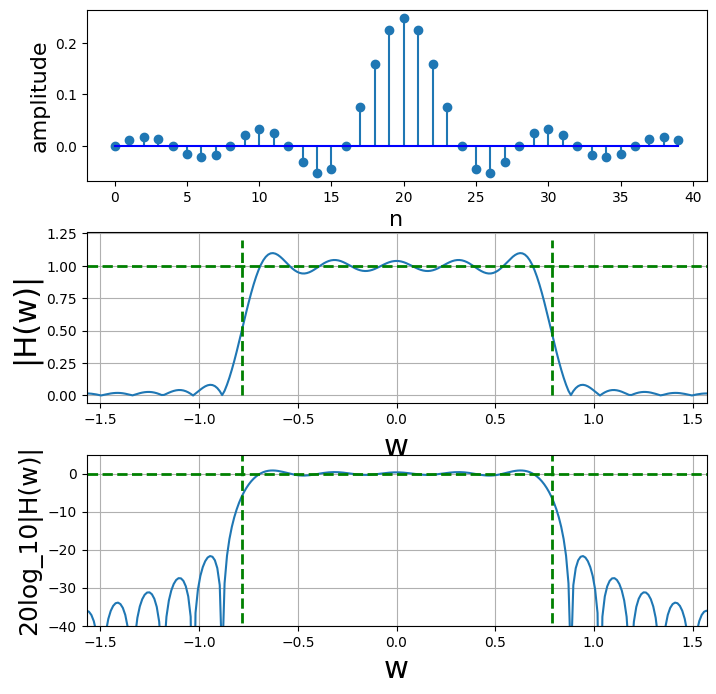

In [28]:
# omega_c = pi/4

wc = pi/4
M=20
N = 512 # DFT size
n = arange(-M,M)
h = wc/pi * sinc(wc*(n)/pi)  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
plt.subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("n",fontsize=16)
ax.set_ylabel("amplitude",fontsize=16)

ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"w",fontsize=22)
ax.set_ylabel(r"|H(w)|",fontsize=22)
ax.grid()

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.grid()
ax.set_xlabel(r"w",fontsize=22)
ax.set_ylabel(r"20log_10|H(w)|",fontsize=18)
#ax.axis( ymin=-40,xmax=pi/2)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)


C:\Users\darth\AppData\Local\Temp\ipykernel_17868\4131157750.py:12: RuntimeWarning: invalid value encountered in divide
  hd_M1 = np.sin(wc * (n1 - M1)) / (np.pi * (n1 - M1))
C:\Users\darth\AppData\Local\Temp\ipykernel_17868\4131157750.py:13: RuntimeWarning: invalid value encountered in divide
  hd_M2 = np.sin(wc * (n2 - M2)) / (np.pi * (n2 - M2))


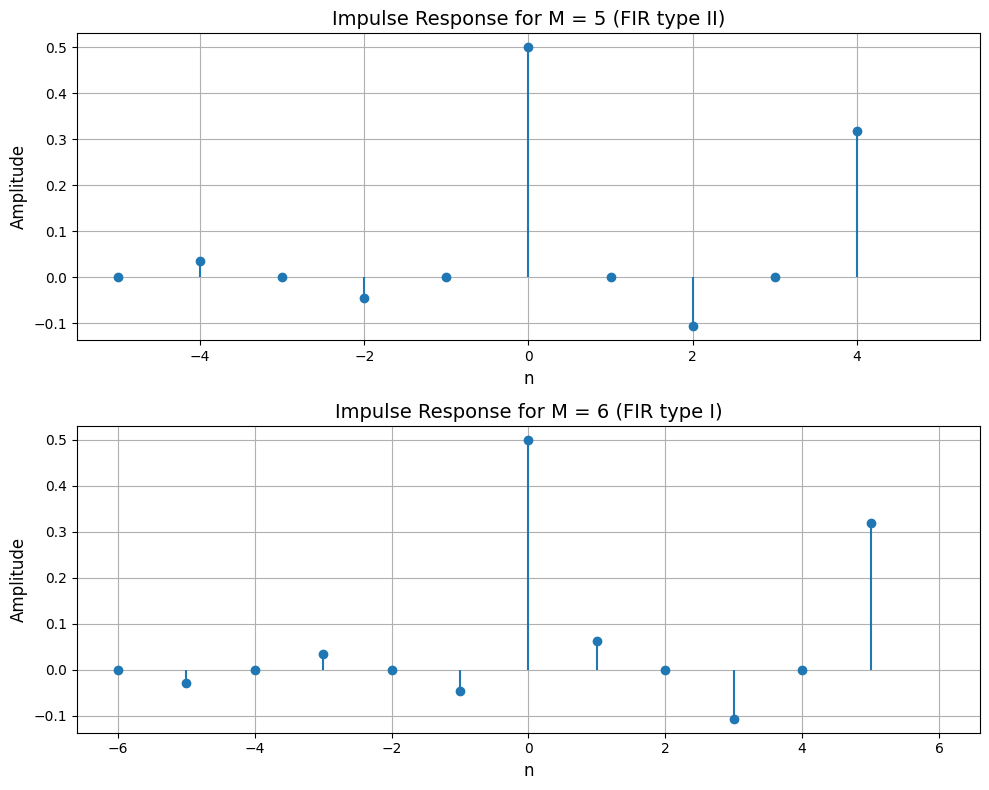

In [18]:
# Define the cutoff frequency
wc = np.pi / 2

# Define n for M=5 (FIR type II) and M=6 (FIR type I)
M1 = 5
M2 = 6

n1 = np.arange(-M1, M1 + 1)
n2 = np.arange(-M2, M2 + 1)

# Compute the ideal impulse responses for M=5 and M=6
hd_M1 = np.sin(wc * (n1 - M1)) / (np.pi * (n1 - M1))
hd_M2 = np.sin(wc * (n2 - M2)) / (np.pi * (n2 - M2))

# Handle the case where n - M = 0 to avoid division by zero
hd_M1[M1] = wc / np.pi
hd_M2[M2] = wc / np.pi

# Plot the impulse responses
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].stem(n1, hd_M1, basefmt=" ")
ax[0].set_title(f'Impulse Response for M = {M1} (FIR type II)', fontsize=14)
ax[0].set_xlabel('n', fontsize=12)
ax[0].set_ylabel('Amplitude', fontsize=12)
ax[0].grid(True)

ax[1].stem(n2, hd_M2, basefmt=" ")
ax[1].set_title(f'Impulse Response for M = {M2} (FIR type I)', fontsize=14)
ax[1].set_xlabel('n', fontsize=12)
ax[1].set_ylabel('Amplitude', fontsize=12)
ax[1].grid(True)

plt.tight_layout()
plt.show()


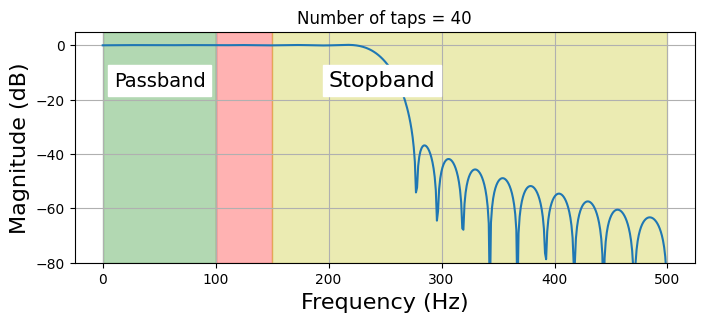

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import signal
# from scipy.signal import firwin, freqz
# from matplotlib.patches import Rectangle

# # Kaiser window parameters
# delta = 0.01  # Desired ripple in passband/stopband (40 dB attenuation)
# fpass = 0.2  # Passband edge frequency (normalized)
# fstop = 0.3  # Stopband edge frequency (normalized)
# fs = 1.0  # Sampling frequency (normalized, 1 corresponds to Nyquist frequency)

# fs = 1e3 # sample rate in Hz
# fpass = 100 # in Hz
# fstop = 150 # in Hz
# delta = 60 # in dB, desired attenuation in stopband


# # Determine the order of the filter and beta for Kaiser window
# M, beta = signal.kaiserord(20 * np.log10(delta), (fstop - fpass) / (fs / 2))

# # Design the FIR filter with a Kaiser window
# hn = firwin(numtaps=M,
#             cutoff=(fstop + fpass) / 2.,
#             window=('kaiser', beta),
#             fs=fs / 2)

# # Frequency response of the filter
# w, H = freqz(hn)

# # Plotting the magnitude response in dB
# fig, ax = plt.subplots()
# fig.set_size_inches((8, 3))

# ax.plot(w / np.pi * fs / 2., 20 * np.log10(np.abs(H)))
# ax.set_xlabel("Frequency (Hz)", fontsize=16)
# ax.set_ylabel("Magnitude (dB)", fontsize=16)
# ymin, ymax = -80, 5
# ax.axis(ymin=ymin, ymax=ymax)

# # Highlight passband, stopband, and transition band
# ax.add_patch(Rectangle((0, ymin), width=fpass, height=ymax - ymin, color='g', alpha=0.3))
# ax.add_patch(Rectangle((fpass, ymin), width=fstop - fpass, height=ymax - ymin, color='r', alpha=0.3))
# ax.add_patch(Rectangle((fstop, ymin), width=fs / 2 - fstop, height=ymax - ymin, color='y', alpha=0.3))

# ax.set_title(f"Number of taps = {M}")
# ax.text(10, -15, 'Passband', fontsize=14, bbox=dict(color='white'))
# ax.text(200, -15, 'Stopband', fontsize=16, bbox=dict(color='white'))
# ax.grid()

# # Save figure (optional)
# # fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

# plt.show()


## Low Pass Filter using Blackman window method

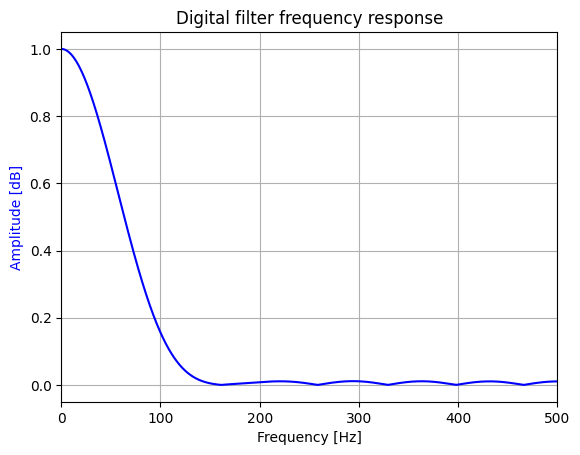

In [ ]:
# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

# Kaiser

The most popular window used for this method of filter design is the Kaiser-Bessel window because it provides extra parameters for tuning the frequency response. Let's consider a design example using Kaiser-Bessel and the filter design tools in the signal.fir_filter_design module.

The signal.fir_filter_design module provides functions for filter design using the Kaiser-Bessel window ( among other windows). For example, to design a lowpass filter using the Kaiser-Bessel window, we need the a subset of the following parameters: maximum passband ripple (
), width of the transition region, Kaiser-Bessel parameter 
, and the number of filter taps. The fir_filter_design provides tools to solve for some of these parameters given others. For example, the fir_filter_design.kaiserord() function can determine the number of taps given the maximum allowable passband ripple and the width of the transition region.

Consider the following low pass filter specification.

In [ ]:
Ns =300 # number of samples 
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband

C:\Users\darth\AppData\Local\Temp\ipykernel_15792\4128149955.py:1: DeprecationWarning: Please import `kaiserord` from the `scipy.signal` namespace; the `scipy.signal.fir_filter_design` namespace is deprecated and will be removed in SciPy 2.0.0.
  M, beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))


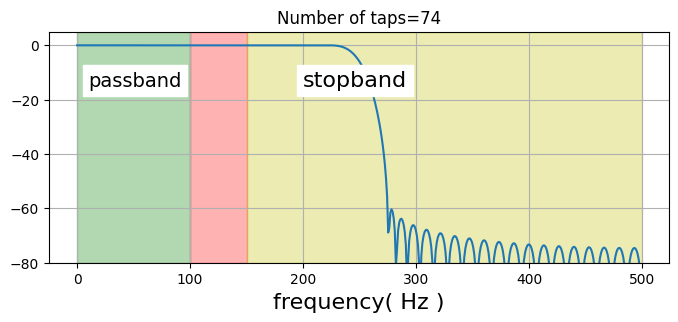

In [ ]:
M, beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

hn = firwin(numtaps = M,
            cutoff = (fstop+fpass)/2.,
            window=('kaiser', beta),
            fs=fs/2.)
w, H = freqz(hn) # frequency response

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/np.pi * fs/2., 20 * np.log10(abs(H)))
ax.set_xlabel("frequency( Hz )",fontsize=16)
ax.set_ylabel(r"",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,height=ymax-ymin,color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,height=ymax-ymin,color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,height=ymax-ymin,color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)